# **Extracting inner features of images using CNN**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [46]:
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define kernel
kernel = tf.constant([
          [-1, -1, -1],
					[-1,  8, -1],
					[-1, -1, -1],
				], dtype=tf.float32)

In [47]:
# reshape
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
#kernel = tf.cast(kernel, dtype=tf.float32)

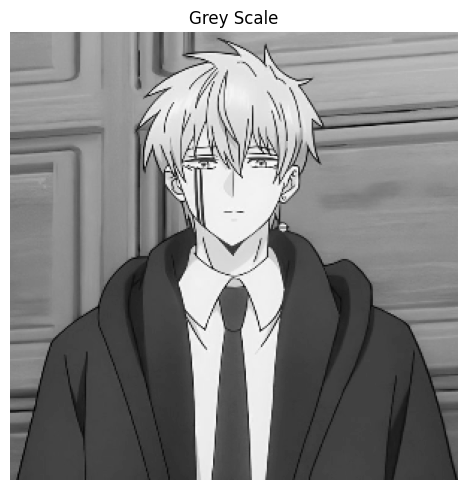

In [48]:
# load image
img = tf.io.read_file('lance.jpeg')
img = tf.io.decode_jpeg(img, channels=1)
img = tf.image.resize(img, size=[300, 300])
#img = tf.cast(img, dtype=tf.float32) / 255.0
#img = tf.squeeze(img)
#img = tf.squeeze(img).numpy()
#img = tf.image.convert_image_dtype(img, dtype=tf.float32)
img = tf.expand_dims(img, axis=0)  # batch dimension

plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(img), cmap='gray')
plt.axis('off')
plt.title('Grey Scale')
plt.show();

In [49]:
print("Image shape:", img.shape)

Image shape: (1, 300, 300, 1)


In [41]:
# conf kernel
# kernel = tf.expand_dims(kernel, axis=-1)  # Add channel dimension
# kernel = tf.expand_dims(kernel, axis=-1)  # Add batch dimension

In [50]:
print("Kernel shape:", kernel.shape)

Kernel shape: (3, 3, 1, 1)


In [51]:
# CNN
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=img,
    filters=kernel,
    strides=[1, 1, 1, 1],
    padding='SAME',
    data_format='NHWC'
)

Text(0.5, 1.0, 'Convolution')

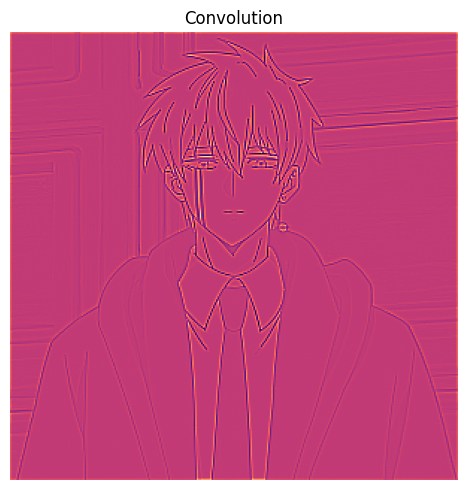

In [63]:
# convolutional layer
plt.figure(figsize=(12, 5))
plt.imshow(
	tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

Text(0.5, 1.0, 'Activation')

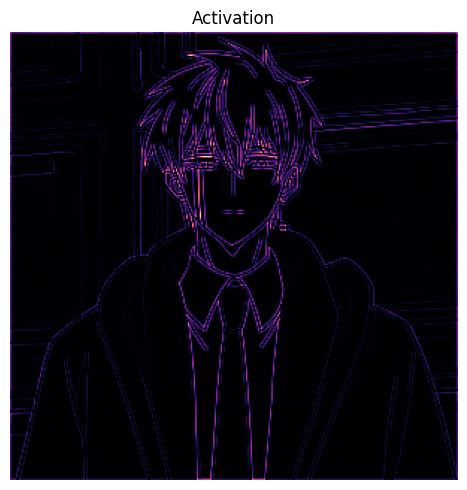

In [62]:
# activation layer
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.figure(figsize=(12, 5))
plt.imshow(
	tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

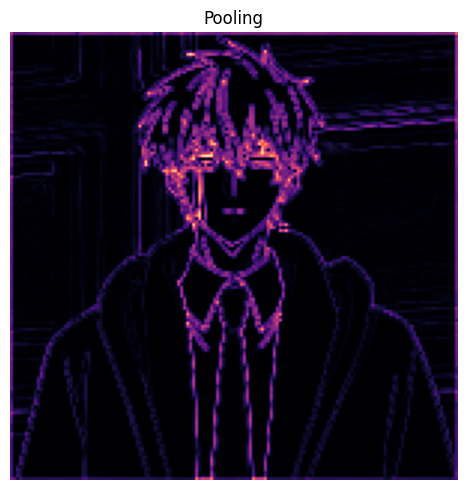

In [64]:
# pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
							window_shape=(2, 2),
							pooling_type='MAX',
							strides=(2, 2),
							padding='SAME',
							)

plt.figure(figsize=(12, 5))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()